In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
train = pd.read_csv('/content/drive/MyDrive/train.csv')
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [4]:
train.shape

(245725, 11)

In [5]:
test = pd.read_csv('/content/drive/MyDrive/test.csv')
test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [6]:
test.shape

(105312, 10)

In [7]:
train.describe(include='all')

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
count,245725,245725,245725.000000,245725,245725,245725,245725.000000,216400,2.457250e+05,245725,245725.000000
unique,245725,2,NaN,35,4,4,NaN,2,NaN,2,NaN
top,G6DDKE5T,Male,NaN,RG268,Self_Employed,X1,NaN,No,NaN,No,NaN
freq,1,134197,NaN,35934,100886,103718,NaN,144357,NaN,150290,NaN
mean,NaN,NaN,43.856307,NaN,NaN,NaN,46.959141,NaN,1.128403e+06,NaN,0.237208
std,NaN,NaN,14.828672,NaN,NaN,NaN,32.353136,NaN,8.529364e+05,NaN,0.425372
min,NaN,NaN,23.000000,NaN,NaN,NaN,7.000000,NaN,2.079000e+04,NaN,0.000000
25%,NaN,NaN,30.000000,NaN,NaN,NaN,20.000000,NaN,6.043100e+05,NaN,0.000000
50%,NaN,NaN,43.000000,NaN,NaN,NaN,32.000000,NaN,8.946010e+05,NaN,0.000000
75%,NaN,NaN,54.000000,NaN,NaN,NaN,73.000000,NaN,1.366666e+06,NaN,0.000000


In [8]:
# Droppinf ID columns as its each value is unique
train.drop('ID',axis=1,inplace=True)
test.drop('ID',axis=1,inplace=True)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Gender               245725 non-null  object
 1   Age                  245725 non-null  int64 
 2   Region_Code          245725 non-null  object
 3   Occupation           245725 non-null  object
 4   Channel_Code         245725 non-null  object
 5   Vintage              245725 non-null  int64 
 6   Credit_Product       216400 non-null  object
 7   Avg_Account_Balance  245725 non-null  int64 
 8   Is_Active            245725 non-null  object
 9   Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 18.7+ MB


In [10]:
train.isnull().sum()


Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [11]:
test.isnull().sum()

Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

In [12]:
train.Credit_Product.value_counts()

No     144357
Yes     72043
Name: Credit_Product, dtype: int64

In [13]:
# Filling null values in credit_product with forward fill method
train = train.fillna(method='ffill')
test = test.fillna(method='ffill')

In [14]:
train.Credit_Product.value_counts()

No     163751
Yes     81974
Name: Credit_Product, dtype: int64

In [15]:
# Verifying null values
train.isnull().sum()

Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


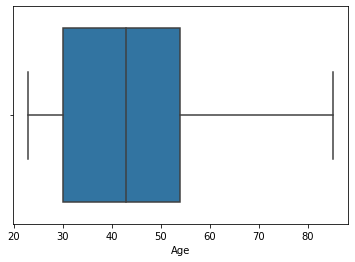

In [16]:
sns.boxplot(train.Age)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


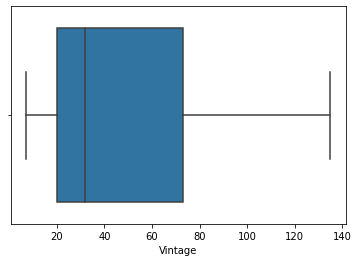

In [17]:
sns.boxplot(train.Vintage)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


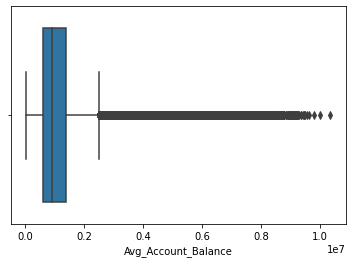

In [18]:
# Outliers are there for Avg_Account_Balance

sns.boxplot(train.Avg_Account_Balance)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


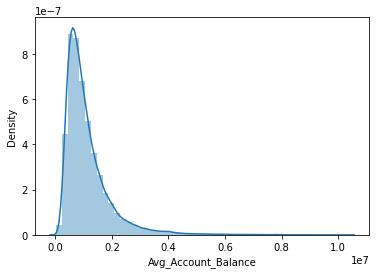

In [19]:
sns.distplot(train.Avg_Account_Balance)

In [20]:
train.Avg_Account_Balance.min()

20790

In [21]:
train.Avg_Account_Balance.max()

10352009

In [22]:
acc_with_high_bal = train[train.Avg_Account_Balance>400000]
acc_with_high_bal.shape[0]

226670

In [23]:
train.shape

(245725, 10)

In [24]:
# Removinh 3% outliers 
x = train.Avg_Account_Balance.quantile(0.97)
train_new = train[train.Avg_Account_Balance < x]
train_new.shape

(238351, 10)

In [25]:
train_new.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,Female,30,RG282,Salaried,X1,33,No,886787,No,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


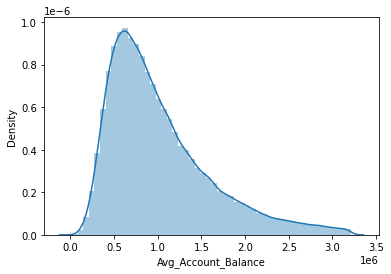

In [26]:
# Still skewness os there but better than previous
sns.distplot(train_new.Avg_Account_Balance)

In [27]:
Y=train_new[['Is_Lead']]

X=train_new.drop(['Is_Lead'],axis=1)

In [28]:
# Identifying categorical and numerical features
num=X.select_dtypes(include="number")
cat=X.select_dtypes(include="object")

In [29]:
num.columns

Index(['Age', 'Vintage', 'Avg_Account_Balance'], dtype='object')

In [30]:
cat.columns

Index(['Gender', 'Region_Code', 'Occupation', 'Channel_Code', 'Credit_Product',
       'Is_Active'],
      dtype='object')

In [31]:
num.head()

,Age,Vintage,Avg_Account_Balance
0,73,43,1045696
1,30,32,581988
2,56,26,1484315
3,34,19,470454
4,30,33,886787


In [32]:
# Removing numerical features with zero variance
from sklearn.feature_selection import VarianceThreshold

varselector= VarianceThreshold(threshold=0)
varselector.fit_transform(num)
# Get columns to keep and create new dataframe with those only
cols = varselector.get_support(indices=True)
num_1 = num.iloc[:,cols]

In [33]:
# none of numerical columns had zero variance
num_1.head()

,Age,Vintage,Avg_Account_Balance
0,73,43,1045696
1,30,32,581988
2,56,26,1484315
3,34,19,470454
4,30,33,886787


In [34]:
# Checking lead conversion percentage

train.Is_Lead.mean()

0.23720826126767727

In [35]:
# Binning numeric values into 10 bins on basis of their quartiles
from sklearn.preprocessing import KBinsDiscretizer
discrete=KBinsDiscretizer(n_bins=10,encode='ordinal', strategy='quantile')
num_binned=pd.DataFrame(discrete.fit_transform(num_1),index=num_1.index, columns=num_1.columns).add_suffix('_Rank')
num_binned.head()

,Age_Rank,Vintage_Rank,Avg_Account_Balance_Rank
0,9.0,5.0,6.0
1,2.0,5.0,2.0
2,8.0,3.0,8.0
3,3.0,2.0,1.0
4,2.0,5.0,5.0


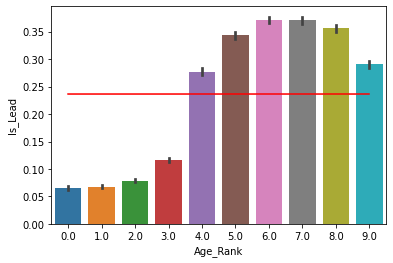

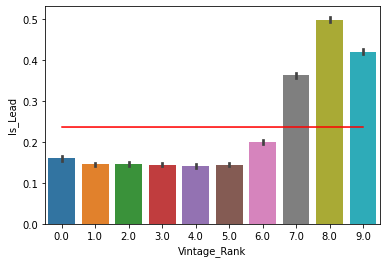

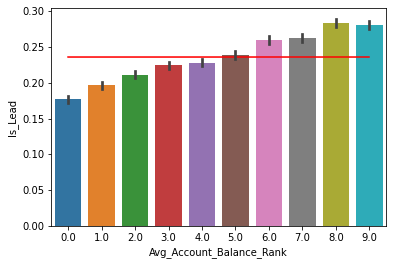

In [36]:
X_bin_combined=pd.concat([Y,num_binned],axis=1,join='inner')

from numpy import mean
for col in (num_binned.columns):
    plt.figure()
    sns.lineplot(x=col,y=X_bin_combined['Is_Lead'].mean(),data=X_bin_combined,color='red')
    sns.barplot(x=col, y="Is_Lead",data=X_bin_combined, estimator=mean )
plt.show()

# For all 3 variables there is a slope indicating higher their value higher changes of lead. Hence all can be good predictors

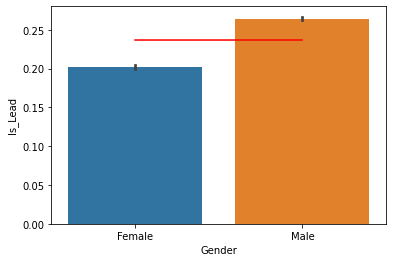

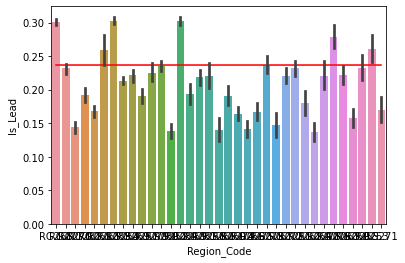

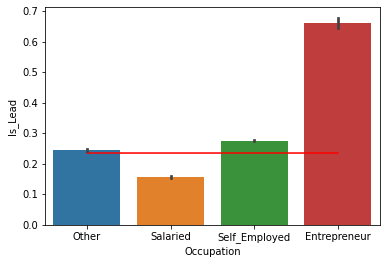

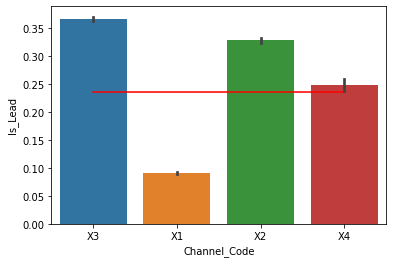

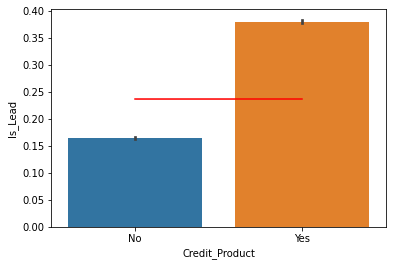

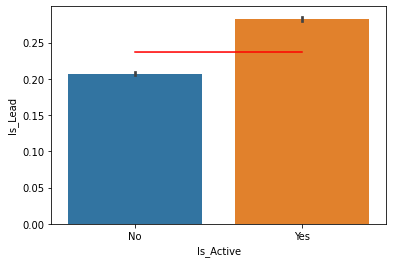

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
X_char_merged=pd.concat([Y,cat],axis=1,join='inner')

from numpy import mean
for col in (cat.columns):
    plt.figure()
    sns.lineplot(x=col,y=X_char_merged['Is_Lead'].mean(),data=X_char_merged,color='red')
    sns.barplot(x=col, y="Is_Lead",data=X_char_merged, estimator=mean )
plt.show()

# All categorical features can be good predictors.

In [41]:
# Create dummy features with n-1 levels
X_char_dum = pd.get_dummies(cat, drop_first = True)
X_char_dum.shape

(238351, 43)

In [47]:
X_all=pd.concat([X_char_dum,num_1],axis=1,join="inner")

In [48]:
X_all.shape

(238351, 46)

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_all, Y, test_size=0.25, random_state=99)

In [51]:
print("Shape of Training Data",X_train.shape)
print("Shape of Testing Data",X_test.shape)
print("Churn Rate in Training Data",y_train.mean())
print("Churn Rate in Testing Data",y_test.mean())

# Leadrate of dataset was 0.237 hence there is no imbalance for training and tesing dataset

Shape of Training Data (178763, 46)
Shape of Testing Data (59588, 46)
Churn Rate in Training Data Is_Lead    0.236548
dtype: float64
Churn Rate in Testing Data Is_Lead    0.235752
dtype: float64


In [52]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(random_state=99)
logreg.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=99, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
y_pred_logreg=logreg.predict(X_test)

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_logreg))
print("Precision",metrics.precision_score(y_test,y_pred_logreg))
print("Recall",metrics.recall_score(y_test,y_pred_logreg))
print("f1_score",metrics.f1_score(y_test,y_pred_logreg))

Accuracy: 0.7642478351345908
Precision 0.0
Recall 0.0
f1_score 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train,y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

KeyboardInterrupt: ignored

In [ ]:
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred_logreg_tuned=logreg.predict(X_test)

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_logreg_tuned))
print("Precision",metrics.precision_score(y_test,y_pred_logreg_tuned))
print("Recall",metrics.recall_score(y_test,y_pred_logreg_tuned))
print("f1_score",metrics.f1_score(y_test,y_pred_logreg_tuned))



In [ ]:
metrics.plot_confusion_matrix(model,X_test,y_test)

In [58]:
# Building a Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='gini',random_state=99)

In [59]:
np.random.seed(44)
from sklearn.model_selection import GridSearchCV
param_dist = {'max_depth': [3, 5, 6, 7], 'min_samples_split': [50, 100, 150, 200, 250] }
tree_grid = GridSearchCV(dtree, cv = 10, param_grid=param_dist,n_jobs = -1)
tree_grid.fit(X_train,y_train) 
print('Best Parameters using grid search: \n', tree_grid.best_params_)

Best Parameters using grid search: 
 {'max_depth': 7, 'min_samples_split': 150}


In [61]:
dtree=DecisionTreeClassifier(max_depth= 7, min_samples_split=150)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=150,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [65]:
y_pred_dt_tuned=dtree.predict(X_test)


In [66]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dt_tuned))
print("Precision",metrics.precision_score(y_test,y_pred_dt_tuned))
print("Recall",metrics.recall_score(y_test,y_pred_dt_tuned))
print("f1_score",metrics.f1_score(y_test,y_pred_dt_tuned))



Accuracy: 0.7950594079344835
Precision 0.605931225478883
Recall 0.3737898633257403
f1_score 0.46235801708197594


In [67]:
# Building a Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='gini',random_state=99,max_depth= 7, min_samples_split=150)
rf.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=150,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=99, verbose=0,
                       warm_start=False)

In [70]:
y_pred_rf_tuned=rf.predict(X_test)


In [71]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf_tuned))
print("Precision",metrics.precision_score(y_test,y_pred_rf_tuned))
print("Recall",metrics.recall_score(y_test,y_pred_rf_tuned))
print("f1_score",metrics.f1_score(y_test,y_pred_rf_tuned))

# Very high precision with random forest

Accuracy: 0.7831610391353964
Precision 0.9392049883086516
Recall 0.08577733485193621
f1_score 0.15719783445306892


In [72]:
import pandas as pd
feature_importances=pd.DataFrame(rf.feature_importances_,
                                 index=X_train.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
Vintage,0.260889
Age,0.245659
Credit_Product_Yes,0.183310
Channel_Code_X2,0.069752
Channel_Code_X3,0.069305
Occupation_Salaried,0.068813
Is_Active_Yes,0.029250
Occupation_Self_Employed,0.021439
Occupation_Other,0.020493
Avg_Account_Balance,0.009868
